In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as ny # linear algebra
import pandas as ps # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/daily-climate-time-series-data/DailyDelhiClimateTrain.csv
/kaggle/input/daily-climate-time-series-data/DailyDelhiClimateTest.csv


In [2]:
dataset = ps.read_csv('/kaggle/input/daily-climate-time-series-data/DailyDelhiClimateTrain.csv')
dataset.head(10)

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
5,2013-01-06,7.000000,82.800000,1.480000,1018.000000
6,2013-01-07,7.000000,78.600000,6.300000,1020.000000
7,2013-01-08,8.857143,63.714286,7.142857,1018.714286
8,2013-01-09,14.000000,51.250000,12.500000,1017.000000
9,2013-01-10,11.000000,62.000000,7.400000,1015.666667


In [3]:
dataset = dataset.iloc[0:100, 0:2]
# dataset = dataset[['date', 'meantemp']]
dataset

,date,meantemp
0,2013-01-01,10.000000
1,2013-01-02,7.400000
2,2013-01-03,7.166667
3,2013-01-04,8.666667
4,2013-01-05,6.000000
...,...,...
95,2013-04-06,25.857143
96,2013-04-07,29.142857
97,2013-04-08,28.714286
98,2013-04-09,30.166667


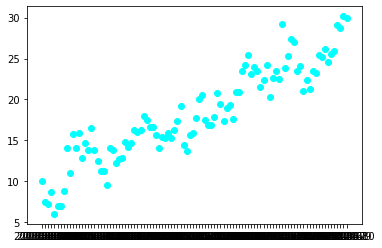

In [4]:
plt.scatter(dataset['date'], dataset['meantemp'], color =  'cyan')

In [5]:
x = dataset['meantemp'].ewm(alpha = 0.9).mean()
x

0     10.000000
1      7.636364
2      7.213213
3      8.521452
4      6.252123
        ...    
95    25.822925
96    28.810864
97    28.723944
98    30.022394
99    30.002239
Name: meantemp, Length: 100, dtype: float64

In [6]:
dataset['EMWA'] = x
dataset.head(10)

,date,meantemp,EMWA
0,2013-01-01,10.000000,10.000000
1,2013-01-02,7.400000,7.636364
2,2013-01-03,7.166667,7.213213
3,2013-01-04,8.666667,8.521452
4,2013-01-05,6.000000,6.252123
5,2013-01-06,7.000000,6.925213
6,2013-01-07,7.000000,6.992521
7,2013-01-08,8.857143,8.670681
8,2013-01-09,14.000000,13.467068
9,2013-01-10,11.000000,11.246707


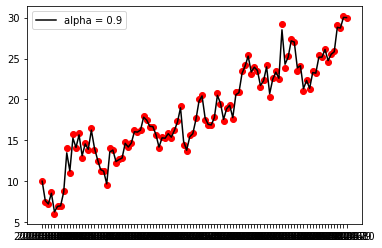

In [7]:
dataset = dataset.head(100)
plt.scatter(dataset['date'], dataset['meantemp'], color = 'red')
plt.plot(dataset['date'], x, color = 'black', label = 'alpha = 0.9')
plt.legend()
plt.show()